Code for Variance Hammer's 'Scoring Systems for Non-competitve Campaigns'
-------
This code is for the analysis of different ways to handle scoring systems for campaigns and other games where runaway victories and player dropout are *not* desirable outcomes. The text of the post itself is at http://www.variancehammer.com/ . Note that because this analysis uses random numbers, any results you obtain may differ from those on the blog posting due to random chance.

In [1]:
%matplotlib inline

In [2]:
# Import the usual libraries
import numpy as np
import random as rand
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

**Standard Scoring By Addition** Assume a victory is worth a flat number of points.

Unbiased Campaign

In [28]:
# Set up a single campaign with five gamess
addcampaign = np.zeros([6,3])

In [33]:
for i in range(5):
    winner = rand.random()
    if winner >= 0.50:
        addcampaign[i+1][0] = addcampaign[i][0]+1
        addcampaign[i+1][1] = addcampaign[i][1]
    else:
        addcampaign[i+1][1] = addcampaign[i][1]+1
        addcampaign[i+1][0] = addcampaign[i][0]
    addcampaign[i+1][2] = abs(addcampaign[i+1][0]-addcampaign[i+1][1])

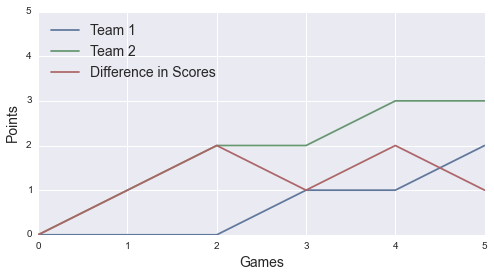

In [54]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
plt.xlim(xmax=5)
plt.ylim(ymax=5)
plt.plot(addcampaign[:,0])
plt.plot(addcampaign[:,1])
plt.plot(addcampaign[:,2])
plt.legend(["Team 1", "Team 2", "Difference in Scores"],loc=2,fontsize=14)
plt.xlabel("Games", size = 14)
plt.ylabel("Points", size = 14)

In [61]:
# Lots of Matches
# Design a single campaign as a function that takes two arguments - a bias, and a number of games
def add_contest(bias,games):
    results = np.zeros([games+1,3])
    for i in range(games):
        winner = rand.random()
        if winner >= bias:
            results[i+1][0] = results[i][0]+1
            results[i+1][1] = results[i][1]
        else:
            results[i+1][1] = results[i][1]+1
            results[i+1][0] = results[i][0]
        results[i+1][2] = abs(results[i+1][0]-results[i+1][1])
        finaldiff = results[-1][2]
    return finaldiff

In [130]:
nruns = 1000
# Lets do an unbiased campaign first...
unbiased_campaigns = np.empty([nruns,1])

In [131]:
for k in range(nruns):
    unbiased_campaigns[k,0] = add_contest(0.50,5)

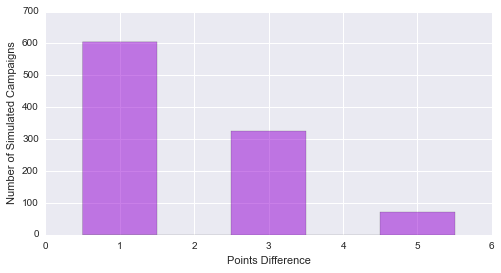

In [132]:
plt.xlim(xmax=6)
plt.hist(unbiased_campaigns[:,0],alpha=0.50,bins =(0.5,1.5,2.5,3.5,4.5,5.5), color="DarkViolet")
plt.xlabel("Points Difference")
plt.ylabel("Number of Simulated Campaigns")

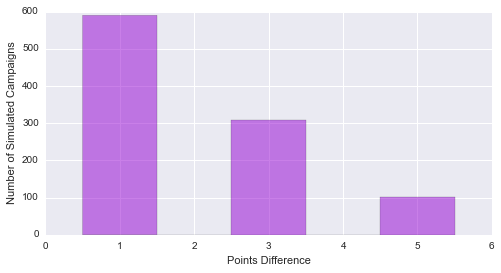

In [133]:
# Now, a campaign with a slight bias - a 60/40 chance of winning
smallbias = np.empty([nruns,1])
for k in range(nruns):
    smallbias[k,0] = add_contest(0.60,5)
    
plt.xlim(xmax=6)
plt.hist(smallbias[:,0],alpha=0.50,bins =(0.5,1.5,2.5,3.5,4.5,5.5), color="DarkViolet")
plt.xlabel("Points Difference")
plt.ylabel("Number of Simulated Campaigns")

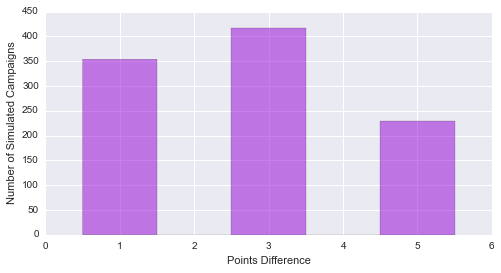

In [134]:
# Now a game with large bias, a 75/25 chance of winning
bigbias = np.empty([nruns,1])
for k in range(nruns):
    bigbias[k,0] = add_contest(0.75,5)
    
plt.xlim(xmax=6)
plt.hist(bigbias[:,0],alpha=0.50,bins =(0.5,1.5,2.5,3.5,4.5,5.5), color="DarkViolet")
plt.xlabel("Points Difference")
plt.ylabel("Number of Simulated Campaigns")

**Nonstandard Scoring** Proposed Scoring System where the points for winning are a multiplier x your opponents current score.

In [209]:
# Single campaign with 5 games
multcampaign = np.empty([6,2])
multcampaign[0,0] = 5
multcampaign[0,1] = 5
for i in range(5):
    winner = rand.random()
    if winner >= 0.50:
        multcampaign[i+1][0] = multcampaign[i][0] + (multcampaign[i][1]*0.2)
        multcampaign[i+1][1] = multcampaign[i][1]
    else:
        multcampaign[i+1][1] = multcampaign[i][1] + (multcampaign[i][0]*0.2)
        multcampaign[i+1][0] = multcampaign[i][0]

In [210]:
multcampaign

array([[ 5.  ,  5.  ],
       [ 6.  ,  5.  ],
       [ 6.  ,  6.2 ],
       [ 6.  ,  7.4 ],
       [ 7.48,  7.4 ],
       [ 8.96,  7.4 ]])

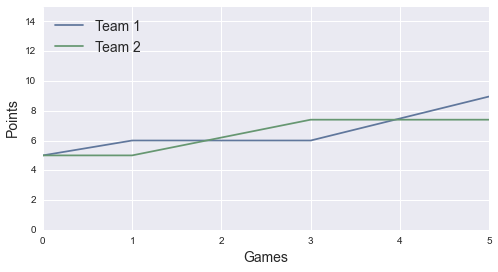

In [211]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
plt.xlim(xmax=5)
plt.ylim(ymax=15)
plt.plot(multcampaign[:,0])
plt.plot(multcampaign[:,1])
plt.legend(["Team 1", "Team 2"],loc=2,fontsize=14)
plt.xlabel("Games", size = 14)
plt.ylabel("Points", size = 14)

In [212]:
if multcampaign[-1,1]+(multcampaign[-1,0]*0.2) < multcampaign[-1,0]:
    a = 1
else:
    a = 0
a

0

In [214]:
# Lots of Multiplied Games
# Somewhat trickier than difference to figure out if it's "pointless" to participate\
# Will also need a new argument for the multiplying factor
def multi_contest(bias,games,factor):
    results = np.zeros([games+1,2])
    results[0,0] = 5
    results[0,1] = 5
    for i in range(5):
        winner = rand.random()
        if winner >= 0.50:
            results[i+1][0] = results[i][0] + (results[i][1]*factor)
            results[i+1][1] = results[i][1]
        else:
            results[i+1][1] = results[i][1] + (results[i][0]*factor)
            results[i+1][0] = results[i][0]
    if results[-1,0] + (results[-1,1]*factor) < results[-1,1]:
        pointless = 1
    elif results[-1,1] + (results[-1,0]*factor) < results[-1,0]:
        pointless = 1
    else:
        pointless = 0
    return pointless

[<matplotlib.text.Text at 0x11caa7390>, <matplotlib.text.Text at 0x11ca05ed0>]

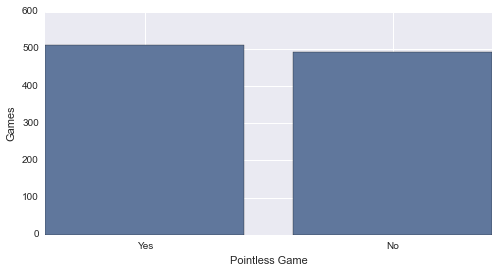

In [229]:
# Lots of Multiplier-based Games
small_factor = np.empty([nruns,1])
for k in range(nruns):
    small_factor[k,0] = multi_contest(0.50,5,0.20)

N = 2
PointlessBreak = (sum(small_factor[:,0]),(nruns - sum(small_factor[:,0])))
ind = np.arange(N)
width = 0.80

fig,ax = plt.subplots()
rects = ax.bar(ind,PointlessBreak, width)
ax.set_ylabel('Games',size=14)
ax.set_xlabel('Pointless Game',size=14)
ax.set_xticks(ind+(width/2))
ax.set_xticklabels(('Yes','No'))

[<matplotlib.text.Text at 0x11d24f150>, <matplotlib.text.Text at 0x11d247590>]

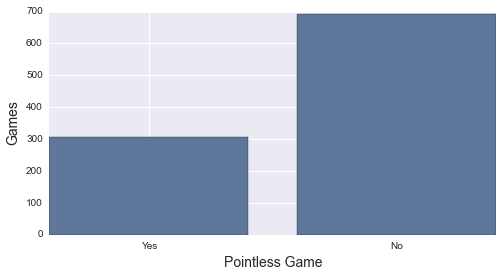

In [234]:
big_factor = np.empty([nruns,1])
for k in range(nruns):
    big_factor[k,0] = multi_contest(0.50,5,0.45)

N = 2
PointlessBreak = (sum(big_factor[:,0]),(nruns - sum(big_factor[:,0])))
ind = np.arange(N)
width = 0.80

fig,ax = plt.subplots()
rects = ax.bar(ind,PointlessBreak, width)
ax.set_ylabel('Games',size=14)
ax.set_xlabel('Pointless Game',size=14)
ax.set_xticks(ind+(width/2))
ax.set_xticklabels(('Yes','No'))

[<matplotlib.text.Text at 0x11d247850>, <matplotlib.text.Text at 0x11d399410>]

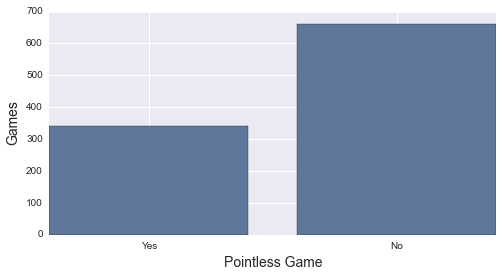

In [235]:
bias_factor = np.empty([nruns,1])
for k in range(nruns):
    bias_factor[k,0] = multi_contest(0.75,5,0.45)

N = 2
PointlessBreak = (sum(bias_factor[:,0]),(nruns - sum(bias_factor[:,0])))
ind = np.arange(N)
width = 0.80

fig,ax = plt.subplots()
rects = ax.bar(ind,PointlessBreak, width)
ax.set_ylabel('Games',size=14)
ax.set_xlabel('Pointless Game',size=14)
ax.set_xticks(ind+(width/2))
ax.set_xticklabels(('Yes','No'))